<a href="https://colab.research.google.com/github/Ashenafidejene/A2SV/blob/main/MNIST_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Building a simple neural-network with Keras

**Author: Xavier Snelgrove**

This is a simple quick-start in performing digit recognition in a neural network in Keras, for a short tutorial at the University of Toronto. It is largely based on the `mnist_mlp.py` example from the Keras source.


## Install prerequisites
First steps (instructions for Mac or Linux). You need to install a recent version of Python, plus the packages `keras`, `numpy`, `matplotlib` and `jupyter`.

### Install a recent Python

If you haven't installed a recent Python I recommend installing via Homebrew on a Mac from http://brew.sh and then installing Python via `brew install python`.


### Configure a virtual environment

You can install the packages globally, but I suggest installing them in a `virtualenv` virtual environment that basically encapsulates a full isolated Python environment. First you'll need to install a Python package manager called `pip` thus:

    easy_install pip
    
(If you get a permissions error, try adding a `sudo` to the beginning, so `sudo easy_install pip`)

Now install virtualenv thus:

    pip install virtualenv

Navigate to your home directory `cd ~` and create a virtual environment. We'll call it `kerasenv`

    virtualenv kerasenv

Now, to switch your shell environment to be within the env:

    source kerasenv/bin/activate
    
Great: now you can install the other prerequisites into this environment.

    pip install numpy jupyter keras matplotlib
    

## Open a new notebook

Now that everything's installed, you can open one of these web-based Python environments with the following command:

    ipython notebook
    
Create a new Python notebook from the "New" menu at the top-right:

<img src="newnotebook.png">

You should now be able to run Python in your browser!

## Time to build a neural network!
First let's import some prerequisites

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load training data

In [4]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

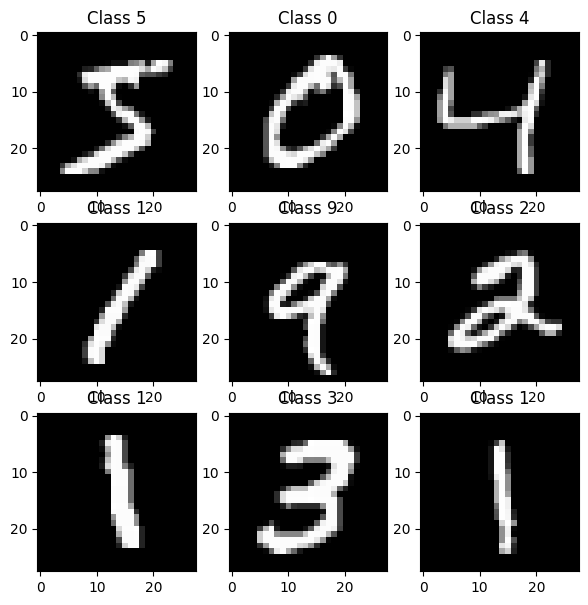

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # for format [0- 1] devide by
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
X_train.shape

(60000, 784)

Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [7]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="figure.png" />

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))
#model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.

model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
# This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model
Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [21]:
model.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,  # 'nb_epoch' is now 'epochs'
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9824 - val_loss: 0.0726
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9939 - loss: 0.0171 - val_accuracy: 0.9794 - val_loss: 0.0859
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9942 - loss: 0.0166 - val_accuracy: 0.9822 - val_loss: 0.0862
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.9830 - val_loss: 0.0833
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9831 - val_loss: 0.0864
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9833 - val_loss: 0.0794
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9814 - val_loss: 0.0860
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9957 - loss: 0.0129 - val_

## Finally, evaluate its performance

In [22]:
score = model.evaluate(X_test, Y_test,)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.1182
Test score: 0.08995045721530914
Test accuracy: 0.9821000099182129


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [24]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)  # Convert probabilities to class labels

# If y_test is one-hot encoded, convert it to class labels too
if len(Y_test.shape) > 1:
    y_test = np.argmax(Y_test, axis=1)

# Check which items are correct or wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(f"Correctly classified: {len(correct_indices)}")
print(f"Incorrectly classified: {len(incorrect_indices)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Correctly classified: 9821
Incorrectly classified: 179


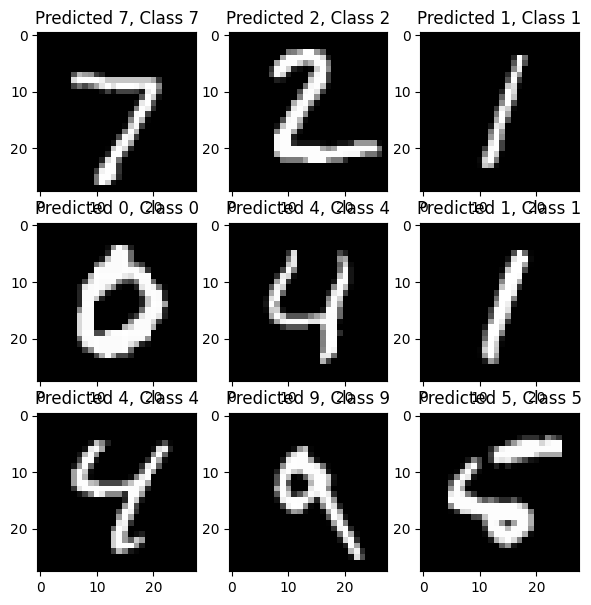

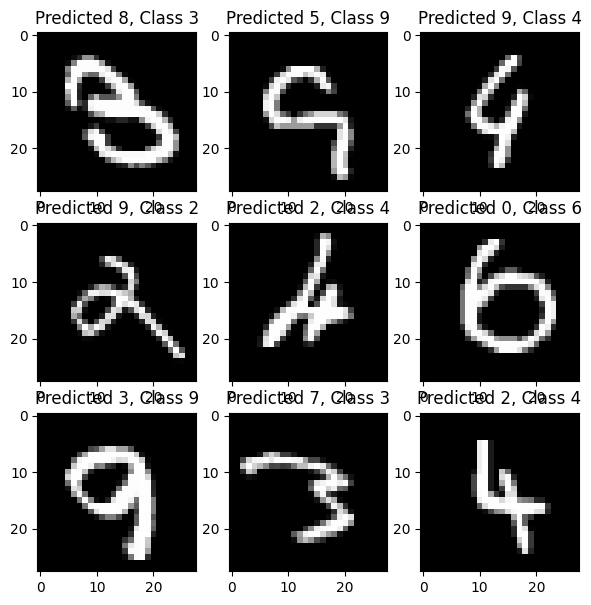

In [25]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras